<h1> Machine Learning using GBC step by step in Python </h1>
<h6 style="background-color:tomato;">by: Hafizh Iman Naufal</h6>
data source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

<h3> Define the problem </h3>
1. Fitur apa yang paling mempengaruhi seseorang untuk berlangganan deposito berjangka?<br>
2. Apakah klien yang memiliki saldo tabungan yang besar akan berlangganan deposito berjangka?<br>
3. Apakah jika klien sebelumnya telah mengambil deposito berjangka tertarik untuk berlangganan Kembali?<br>
4. Model apa yang sesuai digunakan pada data ini?<br>

## Mengimport Data
import data csv menggunakan filedialog

In [163]:
import tkinter as tk
from tkinter import filedialog
tk.Tk().withdraw()
file=filedialog.askopenfilename()

In [164]:
import pandas as pd
import numpy as np
from numpy import nan as Na
datas=pd.read_csv(file,sep=';')

In [165]:
datas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Preparation

1. Cek datum hilang

In [166]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [168]:
print('Cek Data Hilang')
for i in datas.columns:
    print(f'{i}\t ada sebanyak {datas[i].isnull().sum()} hilang'.expandtabs(30))

Cek Data Hilang
age                            ada sebanyak 0 hilang
job                            ada sebanyak 0 hilang
marital                        ada sebanyak 0 hilang
education                      ada sebanyak 0 hilang
default                        ada sebanyak 0 hilang
balance                        ada sebanyak 0 hilang
housing                        ada sebanyak 0 hilang
loan                           ada sebanyak 0 hilang
contact                        ada sebanyak 0 hilang
day                            ada sebanyak 0 hilang
month                          ada sebanyak 0 hilang
duration                       ada sebanyak 0 hilang
campaign                       ada sebanyak 0 hilang
pdays                          ada sebanyak 0 hilang
previous                       ada sebanyak 0 hilang
poutcome                       ada sebanyak 0 hilang
y                              ada sebanyak 0 hilang


In [169]:
datas.isnull().values.any()

False

2. Cek duplikat datum

In [170]:
datas[datas.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


3. Cek outlier pada fitur numerik

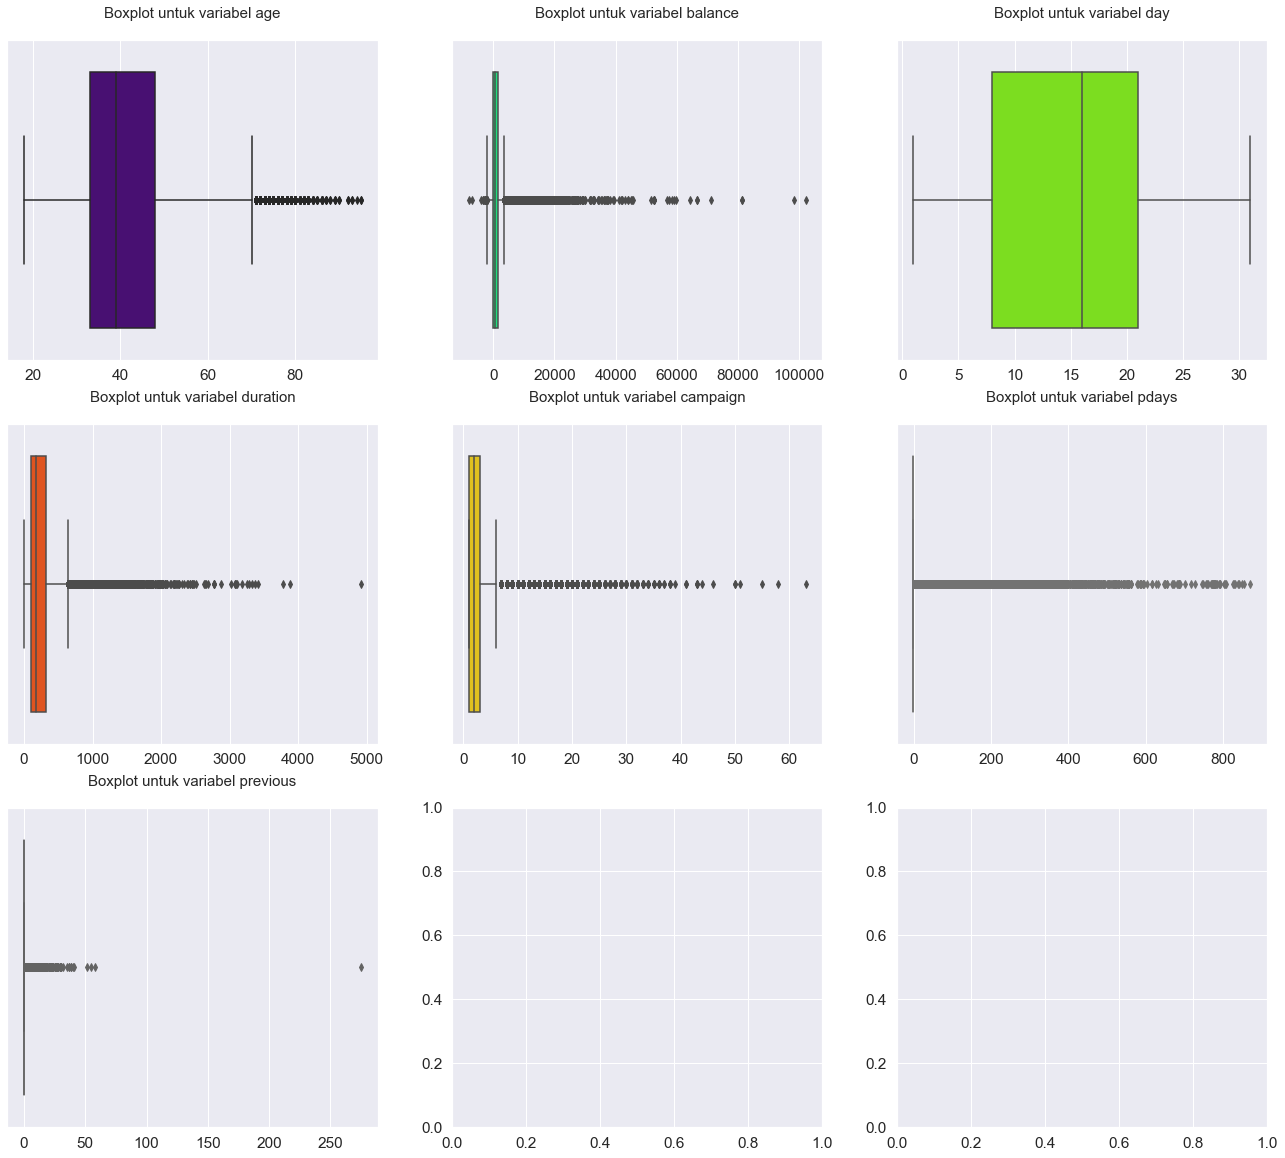

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 20), ncols=3, nrows=3)
plt.subplots_adjust(right=1)
numerik=datas.describe()
kolom_n=list(numerik.columns)
warna=['indigo','springgreen','lawngreen','orangered','gold','khaki','rosybrown']
k=0
for i in range(3):
    for j in range(3):
        sns.boxplot(x=datas[kolom_n[k]],ax=ax[i][j],color=warna[k])
        ax[i][j].set_title(f'Boxplot untuk variabel {kolom_n[k]}', size=15, y=1.05)
        ax[i][j].set_xlabel('')
        k+=1
        if k==len(kolom_n):break

4. Cek invalid & format character pada fitur kategori/label

In [172]:
kategori=datas.describe(include='object')
for i in datas.columns:
    if i in kategori:
        print(f'Kategori pada variabel {i}')
        print(list(datas[i].value_counts().index),'\n')

Kategori pada variabel job
['blue-collar', 'management', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown'] 

Kategori pada variabel marital
['married', 'single', 'divorced'] 

Kategori pada variabel education
['secondary', 'tertiary', 'primary', 'unknown'] 

Kategori pada variabel default
['no', 'yes'] 

Kategori pada variabel housing
['yes', 'no'] 

Kategori pada variabel loan
['no', 'yes'] 

Kategori pada variabel contact
['cellular', 'unknown', 'telephone'] 

Kategori pada variabel month
['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'feb', 'jan', 'oct', 'sep', 'mar', 'dec'] 

Kategori pada variabel poutcome
['unknown', 'failure', 'other', 'success'] 

Kategori pada variabel y
['no', 'yes'] 



## Analisis Data Eksploratori
setelah melalui data preparation maka data siap untuk dianalisis :)

### Grafik heatmap (matriks korelasi)

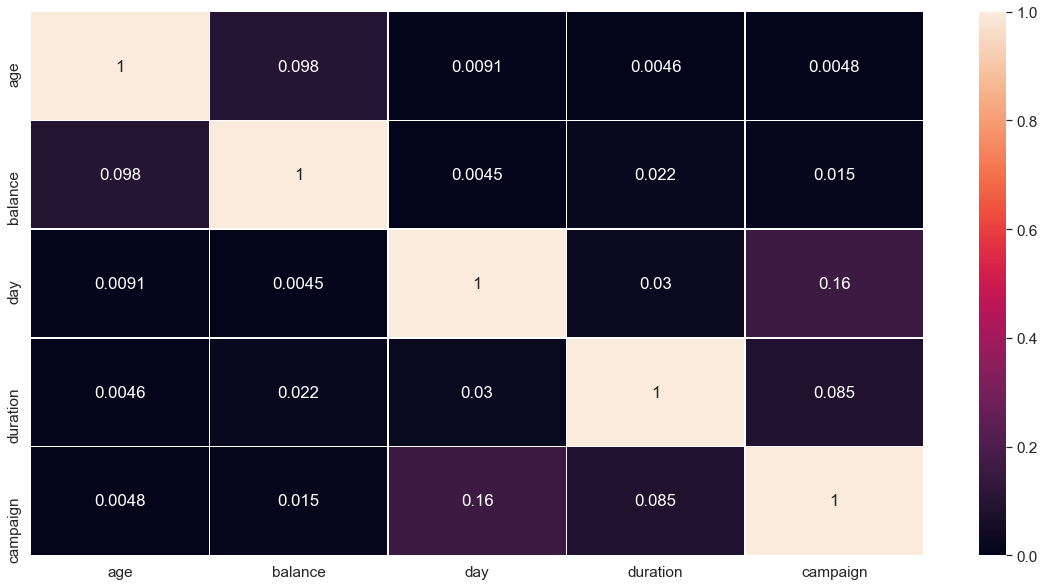

In [173]:
plt.subplots(figsize=(20, 10))
num=['age', 'balance', 'day', 'duration', 'campaign']
ax=sns.heatmap(abs(datas[num].corr()), vmin=0, vmax=1,linewidths=.5,annot=True)
plt.show()

### Bagaimana hubungan Umur (tahun) dengan Saldo (Euro) serta kaitannya dengan deposito berjangka ?


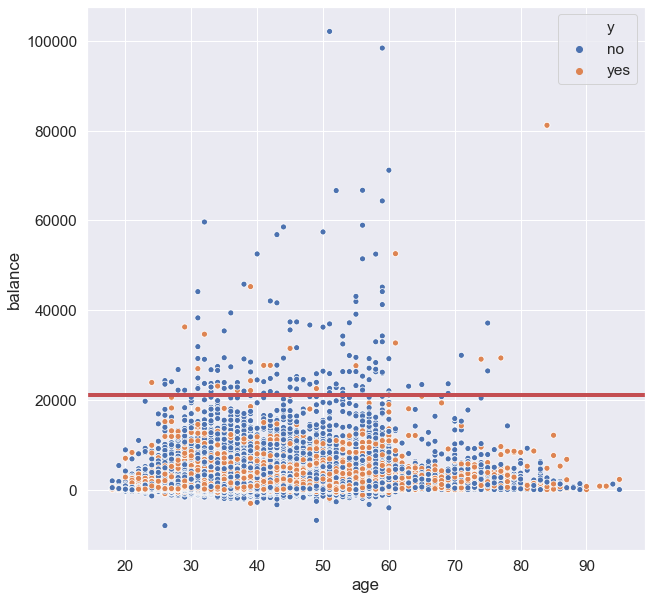

In [174]:
plt.subplots(figsize=(10, 10))
sns.scatterplot(data=datas, x="age", y="balance", hue="y")
plt.axhline(y=21000,linewidth=4, color='r')
plt.show()

1 euro = 17,000 Rupiah

In [182]:
datas.groupby(['y']).agg(rata2=('balance', 'mean'), std=('balance', 'std')).sort_values(by="rata2",ascending=False)

,rata2,std
y,,
yes,1804.267915,3501.104777
no,1303.714969,2974.195473


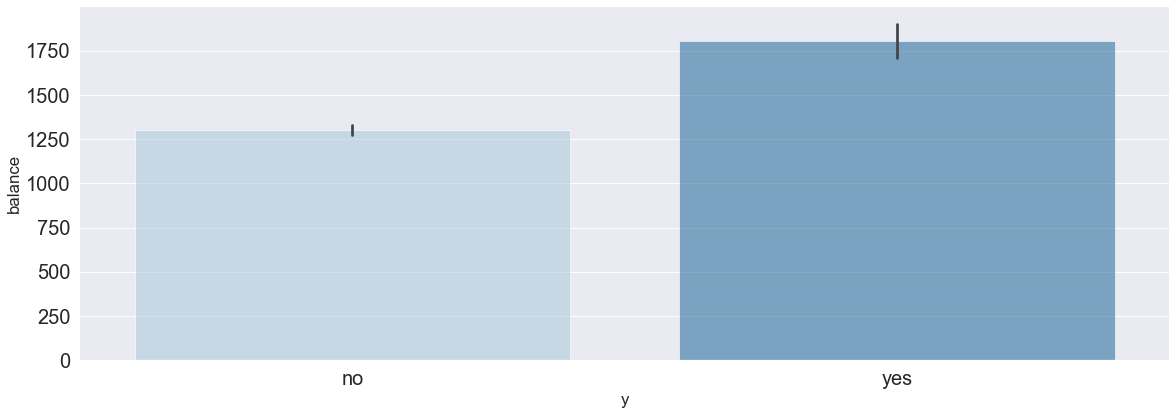

In [191]:
g = sns.catplot(
    data=datas, kind="bar",
    x="y", y="balance", palette="Paired", alpha=.6,height=6, aspect=11/4
)
g.despine(left=True)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [178]:
datas.groupby(['y']).agg(rata2=('age', 'mean'), std=('balance', 'std')).sort_values(by="rata2",ascending=False)

,rata2,std
y,,
yes,41.670070,3501.104777
no,40.838986,2974.195473


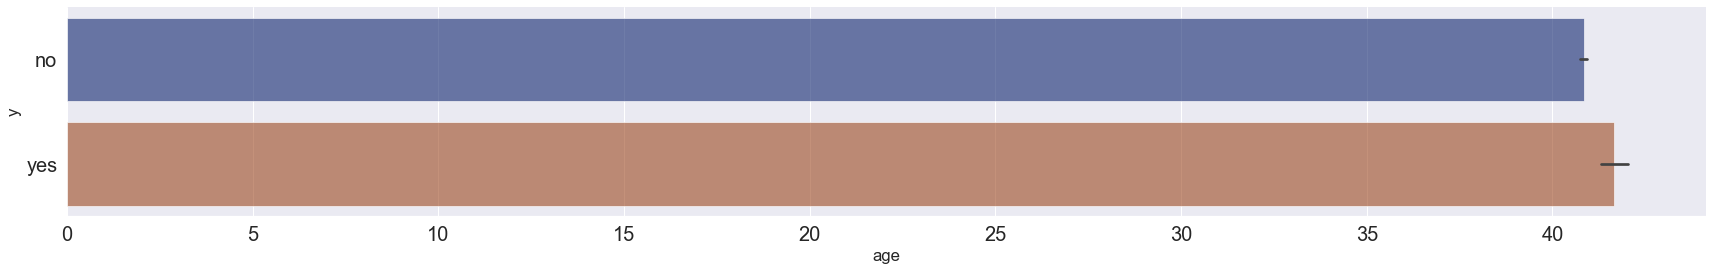

In [190]:
g = sns.catplot(
    data=datas, kind="bar",
    x="age", y="y", palette="dark", alpha=.6,height=4, aspect=6
)
g.despine(left=True)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

### Bagaimana hubungan Fitur kategori  dengan keputusan deposito berjangka ?

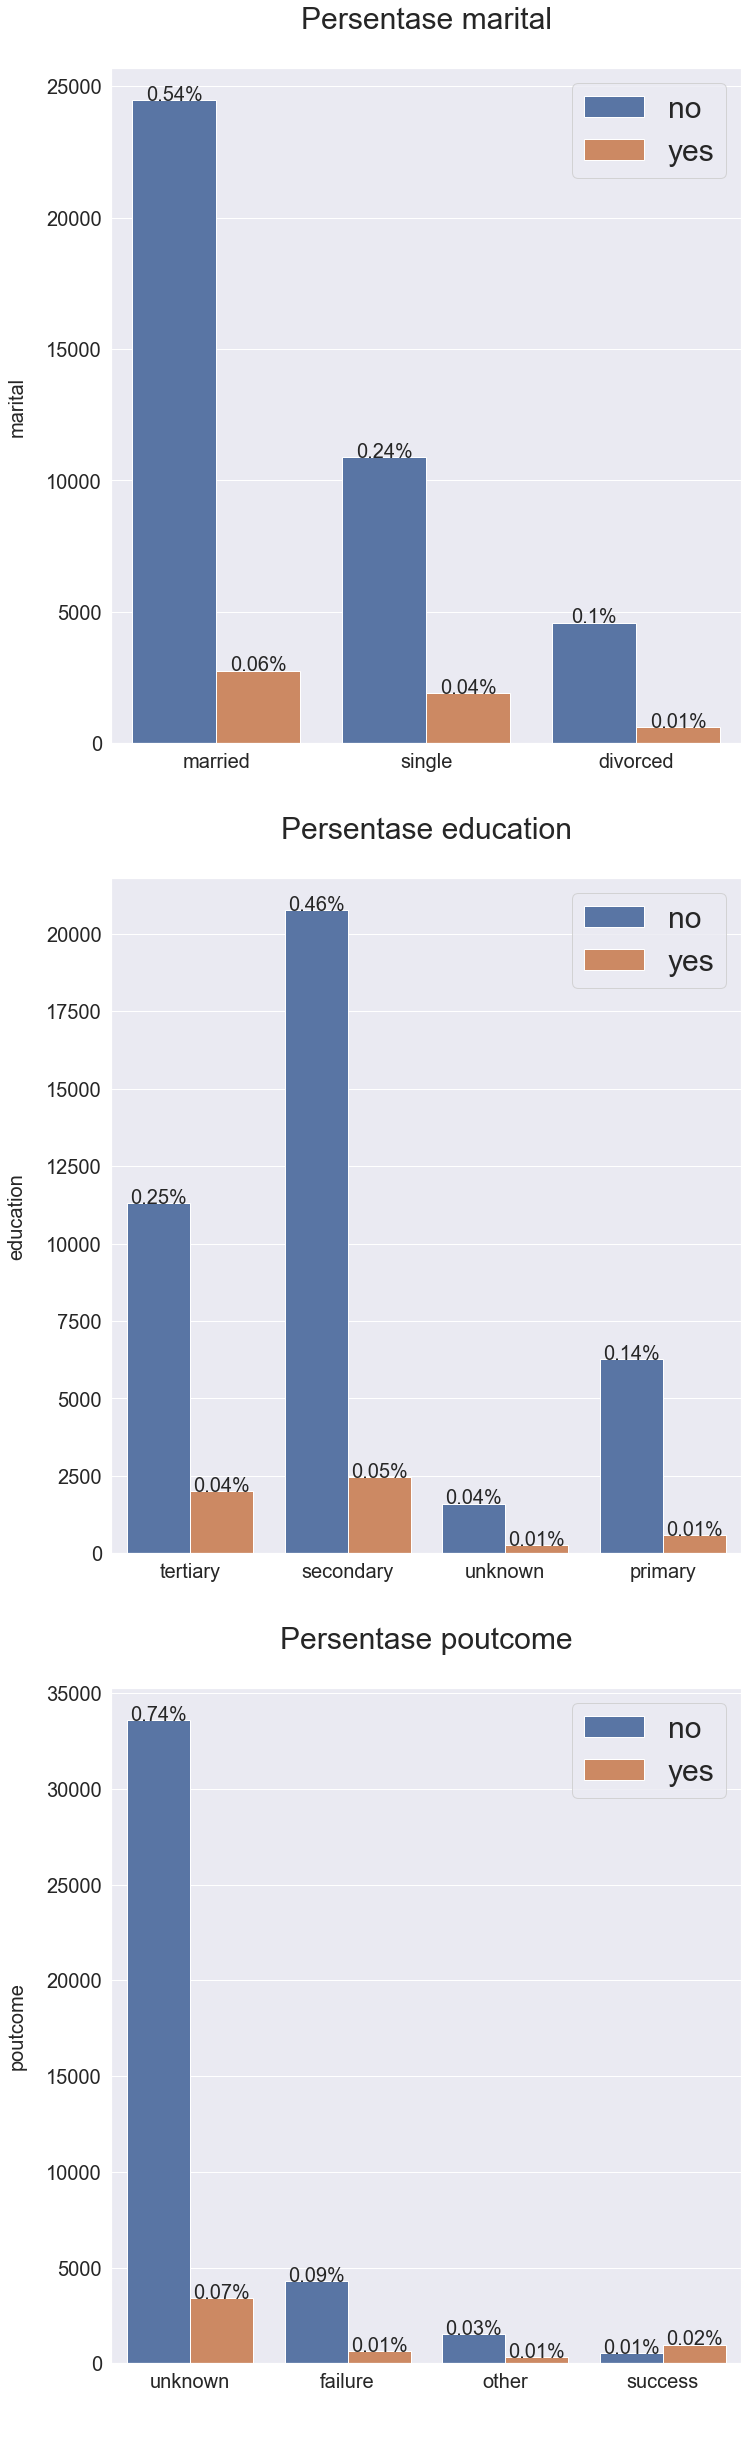

In [380]:
import matplotlib.pyplot as plt
kat=['marital','education','poutcome']
fig, ax = plt.subplots(figsize=(10, 17),ncols=1,nrows=len(kat))
plt.subplots_adjust(right=1, top=2,)
total=len(datas[kat])
for i,j in enumerate(kat):
    plt.subplot(len(kat), 1, i+1)
    ax=sns.countplot(x=j, hue='y', data=datas)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    for k,p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,f'{round(height/total,2)}%',ha="center",fontsize=20)
    plt.legend(['no','yes'],loc='upper right', prop={'size': 30})
    plt.ylabel(j, size=20, labelpad=20)
    plt.xlabel(' ', size=20, labelpad=20)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.title('Persentase {}'.format(j), size=30, y=1.05)
plt.show()

# Modelling
setelah melakukan EDA maka kita dapat melanjutkannya dengan modelling data

In [418]:
datas['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


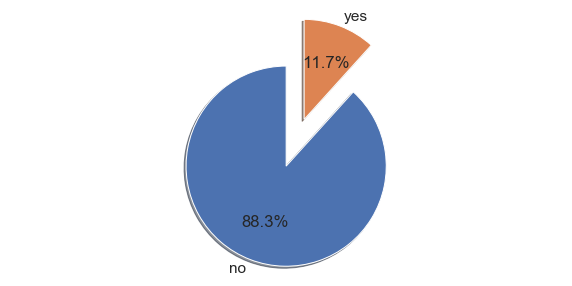

In [415]:
ds=pd.DataFrame(datas['y'].value_counts())
labels = list(ds.index)
sizes = ds
explode = (0,0.5) 
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

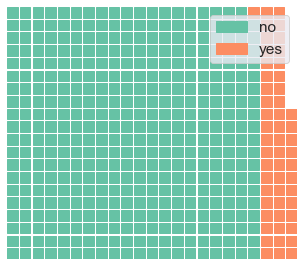

In [222]:
from pywaffle import Waffle
ds=pd.DataFrame(datas['y'].value_counts())
labels = list(ds.index)
sizes = list(ds.iloc[:,0])
das ={'kategori': labels, 
       'frek': sizes} 
df = pd.DataFrame(das) 
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 20, 
    values = round(df.frek/100), 
    labels = labels) 

## Menyiapkan data untuk Modelling

Mentransformasi fitur numerik

In [252]:
from sklearn.preprocessing import MinMaxScaler
data_modeling_numerik=datas[numerik.columns]
# min-max transform
scaler = MinMaxScaler()
scaler.fit(data_modeling_numerik)
dmn=pd.DataFrame(scaler.transform(data_modeling_numerik),columns=data_modeling_numerik.columns)
dmn

,age,balance,day,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000


Mengubah label pada tiap fitur kategori menjadi dummy

In [256]:
data_modeling_kategori=datas[kategori.columns[0:-1]]
data_modeling_kategori

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [275]:
## Merubah jadi dummy
data_modeling_kategori=datas[kategori.columns[0:-1]]
dmk=[]
for i,j in enumerate(kategori.columns[0:-1]):
    a=pd.get_dummies(data_modeling_kategori[j], prefix='_')
    dmk.append(a)
dmk

[       __admin.  __blue-collar  __entrepreneur  __housemaid  __management  \
 0             0              0               0            0             1   
 1             0              0               0            0             0   
 2             0              0               1            0             0   
 3             0              1               0            0             0   
 4             0              0               0            0             0   
 ...         ...            ...             ...          ...           ...   
 45206         0              0               0            0             0   
 45207         0              0               0            0             0   
 45208         0              0               0            0             0   
 45209         0              1               0            0             0   
 45210         0              0               1            0             0   
 
        __retired  __self-employed  __services  __student  __t

Menyatukan Fitur

In [276]:
data_model=pd.concat([dmn,*dmk],axis=1)
data_model['y']=pd.Series(np.where(datas.y.values == 'yes', 1, 0),datas.index)
data_model

,age,balance,day,duration,campaign,pdays,previous,__admin.,__blue-collar,__entrepreneur,...,__mar,__may,__nov,__oct,__sep,__failure,__other,__success,__unknown,y
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [416]:
data_model.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       '__admin.', '__blue-collar', '__entrepreneur', '__housemaid',
       '__management', '__retired', '__self-employed', '__services',
       '__student', '__technician', '__unemployed', '__unknown', '__divorced',
       '__married', '__single', '__primary', '__secondary', '__tertiary',
       '__unknown', '__no', '__yes', '__no', '__yes', '__no', '__yes',
       '__cellular', '__telephone', '__unknown', '__apr', '__aug', '__dec',
       '__feb', '__jan', '__jul', '__jun', '__mar', '__may', '__nov', '__oct',
       '__sep', '__failure', '__other', '__success', '__unknown', 'y'],
      dtype='object')

In [417]:
data_model[['__married','__single','__primary']]

,__married,__single,__primary
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
45206,1,0,0
45207,0,0,1
45208,1,0,0
45209,1,0,0


## Modelling (Classification)

berikut ini akan dilakukan klasifikasi menggunakan algoritma Gradient Boosting

In [277]:
## Splitting data
from sklearn.model_selection import train_test_split
x=data_model.drop(['y'],axis=1)
y=data_model['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13,stratify=y)

In [281]:
print('training')
print(y_train.value_counts(normalize=True))
print('testing')
print(y_test.value_counts(normalize=True))

training
0    0.883022
1    0.116978
Name: y, dtype: float64
testing
0    0.882999
1    0.117001
Name: y, dtype: float64


Mencari hyperparameter terbaik menggunakan GridsearchCV 

In [286]:
### mencari hyper_parameter terbaik
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
# melakukan Gradient-boosting dengan GridSearchCV
gbc=GradientBoostingClassifier(n_estimators=10,random_state=13,learning_rate=0.01,subsample=1)
param_grid={'max_depth':[2,3]}
gscv_gbc=GridSearchCV(gbc,param_grid=param_grid,scoring='roc_auc',cv=10)
gscv_gbc.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=10,
                                                  n_iter_no_change=None,
        

In [287]:
# hyperparameter terbaik
print(f'model GBC terbaik dengan hyperparameter sebagai berikut: {gscv_gbc.best_params_}')
print()
print(f'dengan test score validasi menggunakan kriteria AUC sebesar {gscv_gbc.best_score_}')

model GBC terbaik dengan hyperparameter sebagai berikut: {'max_depth': 3}

dengan test score validasi menggunakan kriteria AUC sebesar 0.8387764938007948


In [421]:
n=10000
n_estimators=n

params = {'n_estimators': n, 'max_depth': 3, 'subsample': 1,'learning_rate': 0.01, 'random_state': 13}

gbc=GradientBoostingClassifier(**params)
gbc.fit(X_train,y_train)

gbc.fit(X_train, y_train)
acc = gbc.score(X_train, y_train)
print(' Validasi training')
print("Akurasi: {:.4f}".format(acc))
print(' Validasi testing')
acc2 = gbc.score(X_test, y_test)
print("Akurasi: {:.4f}".format(acc2))

 Validasi training
Akurasi: 0.9413
 Validasi testing
Akurasi: 0.9067


In [422]:
print(' Validasi training')
print("Akurasi: {:.4f}".format(acc))
print(' Validasi testing')
acc2 = gbc.score(X_test, y_test)
print("Akurasi: {:.4f}".format(acc2))

 Validasi training
Akurasi: 0.9413
 Validasi testing
Akurasi: 0.9067


In [353]:
from sklearn.metrics import roc_curve
from sklearn import metrics

k1=gbc.predict(X_train)
k2=gbc.predict(X_test)

auc = metrics.roc_auc_score(y_train, k1)
print(' Validasi training')
print('nilai AUC sebesar',auc)
#print(metrics.classification_report(y_train, k1))
print()


auc2 = metrics.roc_auc_score(y_test, k2)
print(' Validasi testing')
print('nilai AUC sebesar',auc2)
#print(metrics.classification_report(y_test, k2))

 Validasi training
nilai AUC sebesar 0.8074230377857873

 Validasi testing
nilai AUC sebesar 0.7214337614854012


In [354]:
### hitung AUC
def heldout_score_auc(gbc, X_test, y_test):
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbc.staged_predict(X_test)):
        score[i] = metrics.roc_auc_score(y_test, y_pred)
    return score

# hitung train
train_score = heldout_score_auc(gbc, X_train, y_train)

# hitung test
test_score = heldout_score_auc(gbc, X_test, y_test)

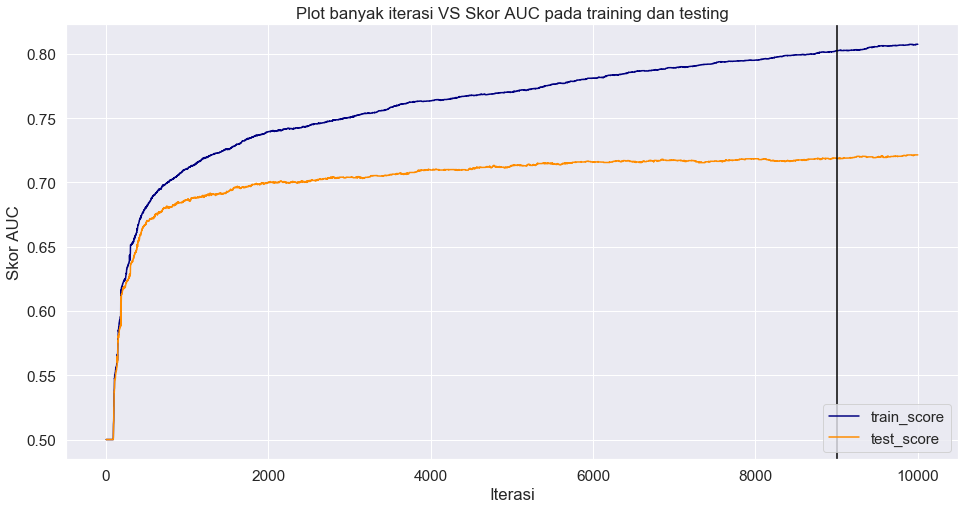

In [369]:
fig,ax=plt.subplots(figsize=(16,8))
x = np.arange(n_estimators) + 1
plt.plot(x, train_score, label='train_score', color='navy')
plt.plot(x, test_score, label='test_score', color='darkorange')


plt.axvline(x=9000, color='black')
plt.xlabel("Iterasi")
plt.ylabel("Skor AUC")
plt.legend(loc='lower right', prop={'size': 15})
plt.title("Plot banyak iterasi VS Skor AUC pada training dan testing")
plt.show()

In [360]:
params = {'n_estimators': 300, 'max_depth': 3, 'subsample': 1,'learning_rate': 0.01, 'random_state': 13}
#params = {'n_estimators': n, 'max_depth': 2, 'subsample': 1,'learning_rate': 0.01, 'random_state': 13}
gbcf=GradientBoostingClassifier(**params)
gbcf.fit(X_train,y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=13, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

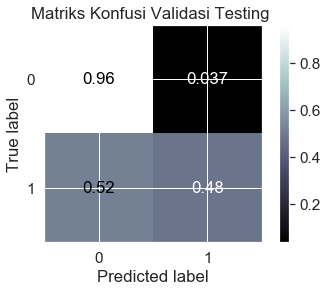

[[0.96334641 0.03665359]
 [0.52047889 0.47952111]]


In [370]:
disp = plot_confusion_matrix(gbc, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.bone,
                                 normalize=normalize)
plt.title("Matriks Konfusi Validasi Testing ")
plt.show()
print(disp.confusion_matrix)

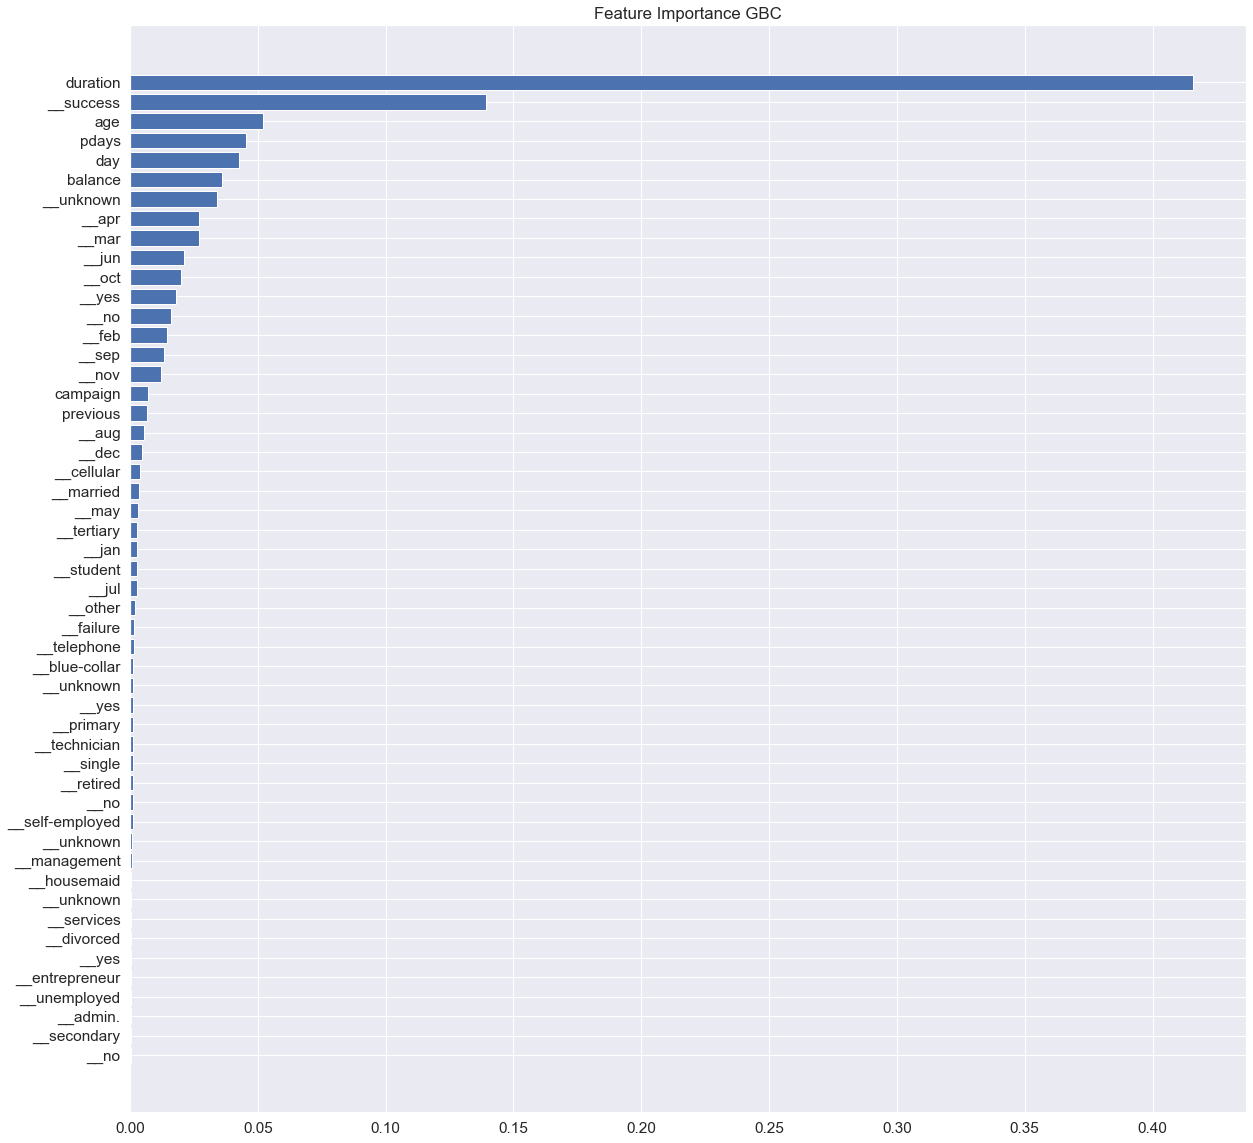

In [371]:
feature_importance = gbc.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(20, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance GBC')
plt.show()

In [377]:
datas.groupby(['y']).agg(rata2=('duration', 'mean'), std=('balance', 'std')).sort_values(by="rata2",ascending=False)

,rata2,std
y,,
yes,537.294574,3501.104777
no,221.182806,2974.195473


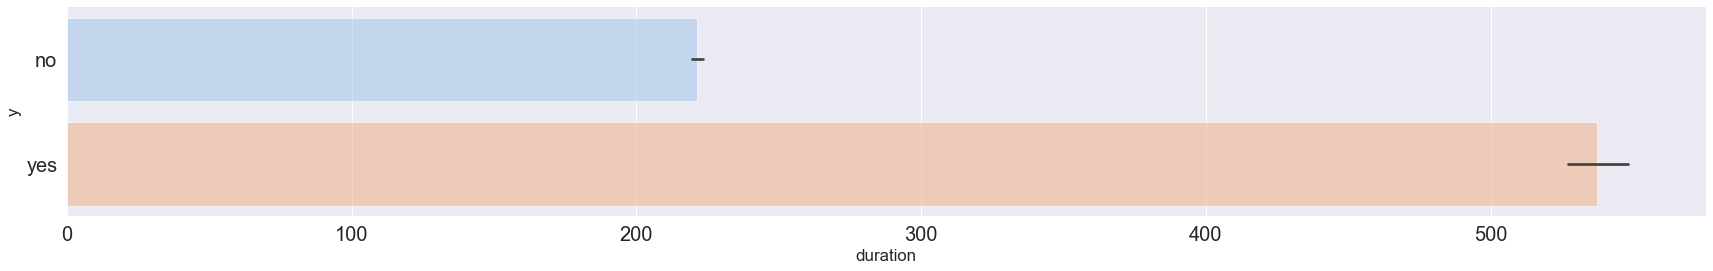

In [378]:
g = sns.catplot(
    data=datas, kind="bar",
    x="duration", y="y", palette="pastel", alpha=.6,height=4, aspect=6
)
g.despine(left=True)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

## Decision Tree

In [374]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=13,max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

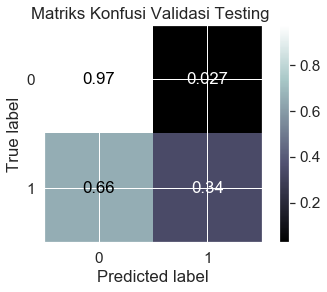

[[0.97278116 0.02721884]
 [0.65658475 0.34341525]]


In [375]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.bone,
                                 normalize=normalize)
plt.title("Matriks Konfusi Validasi Testing ")
plt.show()
print(disp.confusion_matrix)

## GBC VS DT

In [414]:
print('testing')
print(y_test.value_counts(normalize=True))

testing
0    0.882999
1    0.117001
Name: y, dtype: float64


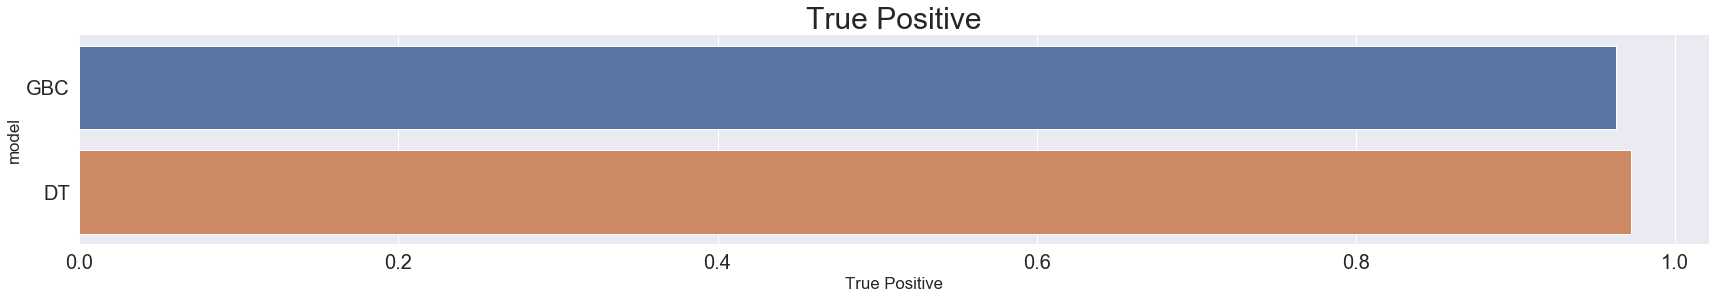

In [412]:
hasil=pd.DataFrame({'model':['GBC','DT'],'True Positive':[0.96334641,0.97278116],'True Negative':[0.47952111,0.34341525]})
hasil
g = sns.catplot(y="model", x="True Positive", kind="bar",data=hasil,height=4, aspect=6,palette='deep');
g.despine(left=True)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.title("True Positive".format(), size=30, y=1.05)
plt.show()

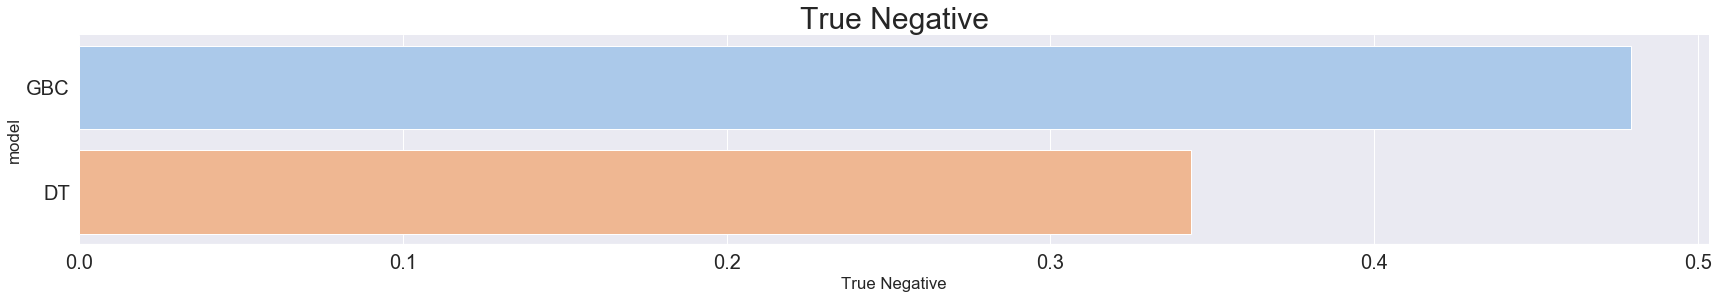

In [413]:
g = sns.catplot(y="model", x="True Negative", kind="bar",data=hasil,height=4, aspect=6,palette='pastel');
g.despine(left=True)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.title("True Negative".format(), size=30, y=1.05)
plt.show()

## Insight

<h3> Problem </h3>
1. Fitur apa yang paling mempengaruhi seseorang untuk berlangganan deposito berjangka?<br>
2. Apakah klien yang memiliki saldo tabungan yang besar akan berlangganan deposito berjangka?<br>
3. Apakah jika klien sebelumnya telah mengambil deposito berjangka tertarik untuk berlangganan Kembali?<br>
4. Model apa yang sesuai digunakan untuk dapat memprediksi seseorang akan berlangganan deposito berjangka atau tidak?<br>

<h3> Answer </h3>
<p style='text-align: justify;'> 1. Fitur lama durasi menelpon menjadi ukuran dalam menentukan seseorang untuk berlangganan deposito berjangka, semakin lama orang tersebut berbicara, maka kemungkinan sangat besar orang tersebut akan mengambil deposito berjangka, sehingga pihak Bank dapat memberikan perhatian khusus terhadap klien ini. </p>

<p style='text-align: justify;'> 2. Ya, pihak Bank dapat meningkatkan efisiensi dengan menghubungi terlebih dahulu seseorang dengan saldo tabungan yang besar saja, karena kemungkinan besar orang tersebut pasti akan mengambil deposito berjangka. </p>

<p style='text-align: justify;'> 3. Ya, pihak Bank dapat meningkatkan efisiensi dengan menghubungi terlebih dahulu seseorang yang sebelumnya sudah mengambil deposito berjangka, karena ada kemungkinan orang tersebut akan mengambil deposito berjangka. </p>

<p style='text-align: justify;'> 4. Model yang sesuai untuk dapat memprediksi seseorang akan berlangganan deposito berjangka atau tidak adalah model klasifikasi ensemble (GBC) mengingat data didominasi oleh orang yang tidak berlangganan deposito berjangka (terdapat kelas yang tidak seimbang), maka model ensemble learning cocok digunakan pada data bertipe seperti ini.</p>